# Taller de Análisis de Texto con Tweets en Español

Este taller guía a los estudiantes en el análisis de tweets en español, usando técnicas de limpieza de texto, análisis de frecuencia de palabras y análisis de sentimientos. También incluye preguntas orientadas al negocio.

In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv

--2025-11-06 00:44:14--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv [following]
--2025-11-06 00:44:14--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205292 (200K) [text/plain]
Saving to: ‘Gender_bias_spanish.csv’

Gender_bias_s

## 1. Configuración e Importación de Librerías
Primero, importaremos las librerías necesarias y cargaremos el conjunto de datos.

In [2]:
!pip install nltk textblob wordcloud
import pandas as pd
import re
from nltk.corpus import stopwords
from textblob import TextBlob
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Cargar el Conjunto de Datos
Cargamos el archivo CSV que contiene los tweets y las etiquetas ('biased' o 'non-biased').

In [3]:
data = pd.read_csv('Gender_bias_spanish.csv')

In [4]:
data

,Contents,Label
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased
4,como siempre mi tortilla triunfa mas que otros...,non-biased
...,...,...
1909,"iba a ir a dash pero mis 3 cortadas, mi color ...",non-biased
1910,que pinche chiste tiene estar medio alto si to...,non-biased
1911,si fuera bien idiota. ya hubiera comprado un a...,non-biased
1912,nota mental: no le quieras ayudar a alguien qu...,non-biased


## 2. Exploración de Datos
Exploraremos el conjunto de datos para entender mejor la distribución de etiquetas y las características de los tweets.

In [6]:
# Resumen del conjunto de datos
print("Forma del DataFrame (Filas, Columnas):", data.shape)
print("\nInformación de las columnas:")
print(data.info())
print("\nDistribución de etiquetas ('Label'):")
print(data['Label'].value_counts())


Forma del DataFrame (Filas, Columnas): (1914, 2)

Información de las columnas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1914 entries, 0 to 1913
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Contents  1914 non-null   object
 1   Label     1914 non-null   object
dtypes: object(2)
memory usage: 30.0+ KB
None

Distribución de etiquetas ('Label'):
Label
non-biased    1596
biased         318
Name: count, dtype: int64


**Pregunta:** ¿Qué proporción de tweets son 'biased' y 'non-biased'? ¿Por qué podría ser importante esta proporción para el análisis de texto?

## 3. Preprocesamiento de Texto
Realizamos una serie de pasos para limpiar y preparar el texto para el análisis: limpieza de caracteres especiales, conversión a minúsculas, y eliminación de stopwords.

In [ ]:
## Cree una funcion limpiar texto

In [7]:
def clean_text(text):
    # 1. Convertir a minúsculas
    text = text.lower()

    # 2. Eliminar menciones (@user)
    text = re.sub(r'@\w+', '', text)

    # 3. Eliminar URLs (http o https)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # 4. Eliminar la mayoría de la puntuación y caracteres especiales (incluye #)
    # Conservamos letras y espacios
    text = re.sub(r'[^a-záéíóúüñ\s]', '', text)

    # 5. Tokenizar y eliminar stopwords
    words = text.split()
    words = [word for word in words if word not in stop_words]

    return " ".join(words)

# Aplicar la función de limpieza
data['Cleaned_Contents'] = data['Contents'].apply(clean_text)

# Mostrar los primeros resultados de la columna limpia
print(data[['Contents', 'Cleaned_Contents']].head())



                                            Contents  \
0  @chumeltorres ya cabrón! sin tí se reciben las...   
1  ¿alguien es tan amable de ir a hacerme la comp...   
2  @jenniferduquee hahaha, si está rico, nadamas ...   
3  @evagelcot donde lo ves!!? es mi programa favo...   
4  como siempre mi tortilla triunfa mas que otros...   

                                    Cleaned_Contents  
0  cabrón tí reciben noticias colchoncito puro ch...  
1  alguien tan amable ir hacerme compra mañana ba...  
2          hahaha si rico nadamas falta presentación  
3  ves programa favorito sólo encuentro temporada...  
4          siempre tortilla triunfa mas platos playa  


## 4. Análisis de Frecuencia de Palabras por Etiqueta
Contamos las palabras en tweets 'biased' y 'non-biased' y visualizamos las palabras más comunes.


Top 15 palabras en tweets 'biased':
    Palabra  Frecuencia
0        si          30
1     mujer          23
2   mujeres          19
3       ser          17
4       así          16
5    quiero          14
6         q          14
7     mejor          13
8      mamá          12
9       tan          12
10     solo          12
11    cosas          10
12    niñas          10
13     casa          10
14       sé           9

Top 15 palabras en tweets 'non-biased':
    Palabra  Frecuencia
0        si         167
1   gracias          90
2      bien          69
3       año          65
4    quiero          62
5       hoy          62
6       día          62
7     mejor          62
8       tan          59
9      días          58
10      así          58
11      ser          55
12      ver          55
13     vida          52
14     pues          52


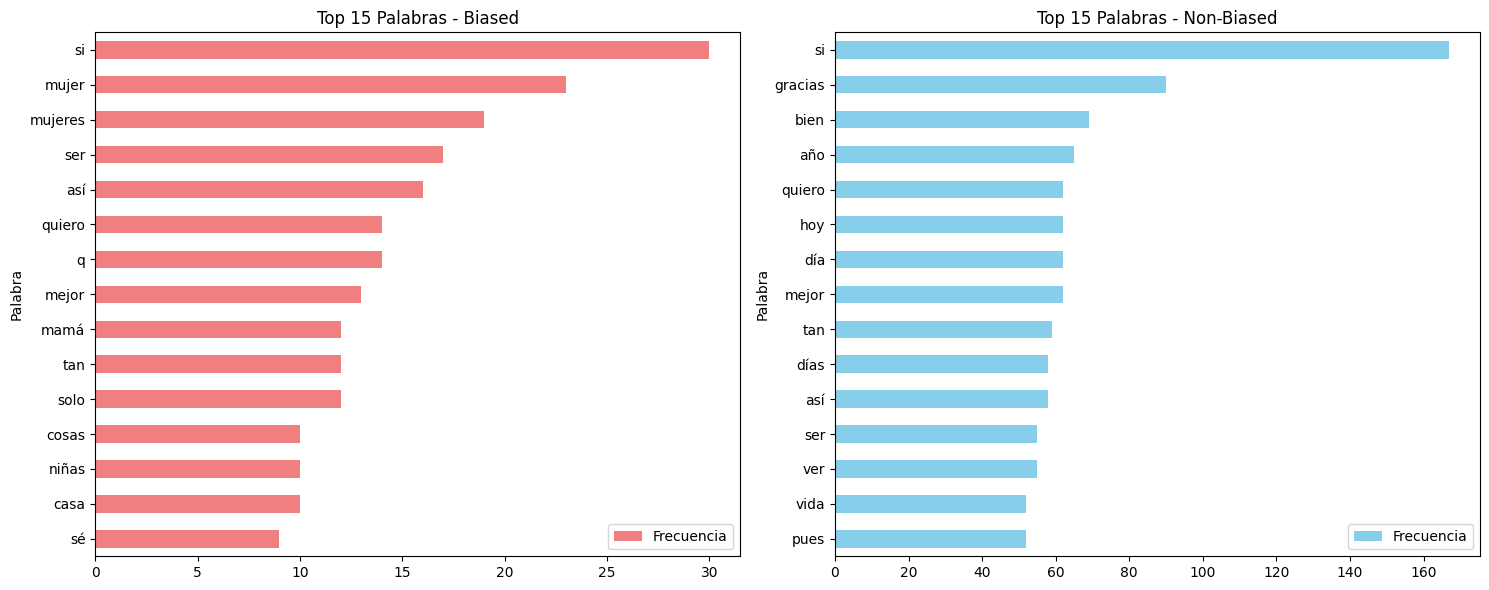

In [8]:


# Contar palabras
# 1. Separar el texto por etiquetas
biased_text = " ".join(data[data['Label'] == 'biased']['Cleaned_Contents']).split()
non_biased_text = " ".join(data[data['Label'] == 'non-biased']['Cleaned_Contents']).split()

# 2. Contar frecuencias
biased_counts = Counter(biased_text)
non_biased_counts = Counter(non_biased_text)

# 3. Mostrar las 15 palabras más comunes en cada grupo
top_n = 15
print(f"\nTop {top_n} palabras en tweets 'biased':")
top_biased = pd.DataFrame(biased_counts.most_common(top_n), columns=['Palabra', 'Frecuencia'])
print(top_biased)

print(f"\nTop {top_n} palabras en tweets 'non-biased':")
top_non_biased = pd.DataFrame(non_biased_counts.most_common(top_n), columns=['Palabra', 'Frecuencia'])
print(top_non_biased)

# 4. Visualización (Gráfico de barras)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

top_biased.plot(kind='barh', x='Palabra', y='Frecuencia', ax=axes[0], color='lightcoral', title=f'Top {top_n} Palabras - Biased')
axes[0].invert_yaxis()

top_non_biased.plot(kind='barh', x='Palabra', y='Frecuencia', ax=axes[1], color='skyblue', title=f'Top {top_n} Palabras - Non-Biased')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()





**Preguntas de Análisis de Frecuencia:**
- ¿Qué palabras son más comunes en los tweets 'biased' en comparación con los 'non-biased'?
- ¿Hay palabras que sugieran un sesgo en los tweets etiquetados como 'biased'?
- ¿Cómo podrían usar las empresas esta información para entender mejor las opiniones sesgadas?


Sentimiento promedio por etiqueta:
        Label  Sentiment_Polarity
0      biased            0.000052
1  non-biased            0.002296


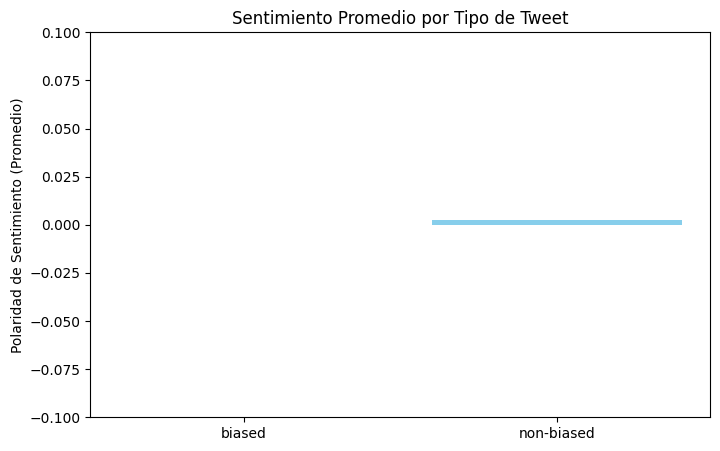


Distribución de clases de Sentimiento en todo el dataset:
Sentiment_Class
Neutral     0.940439
Positivo    0.038662
Negativo    0.020899
Name: proportion, dtype: float64


In [9]:
def get_sentiment(text):
    # TextBlob se usa para calcular la polaridad del sentimiento.
    return TextBlob(text).sentiment.polarity

# Aplicar la función de sentimiento
data['Sentiment_Polarity'] = data['Cleaned_Contents'].apply(get_sentiment)

# Comparar el sentimiento promedio por etiqueta
sentiment_comparison = data.groupby('Label')['Sentiment_Polarity'].mean().reset_index()

print("\nSentimiento promedio por etiqueta:")
print(sentiment_comparison)

# Visualización (Gráfico de barras)
plt.figure(figsize=(8, 5))
plt.bar(sentiment_comparison['Label'], sentiment_comparison['Sentiment_Polarity'], color=['lightcoral', 'skyblue'])
plt.title('Sentimiento Promedio por Tipo de Tweet')
plt.ylabel('Polaridad de Sentimiento (Promedio)')
plt.ylim(-0.1, 0.1) # Ajustar límites para mejor visualización de la diferencia
plt.show()

# Opcional: Clasificación simple del sentimiento
def classify_sentiment(polarity):
    if polarity > 0.05:
        return 'Positivo'
    elif polarity < -0.05:
        return 'Negativo'
    else:
        return 'Neutral'

data['Sentiment_Class'] = data['Sentiment_Polarity'].apply(classify_sentiment)
print("\nDistribución de clases de Sentimiento en todo el dataset:")
print(data['Sentiment_Class'].value_counts(normalize=True))

## 6. Visualización con Nube de Palabras
Usamos una nube de palabras para visualizar las palabras más comunes en cada conjunto de tweets.

In [ ]:
## Cree una funcion para geenrar nube de palabras

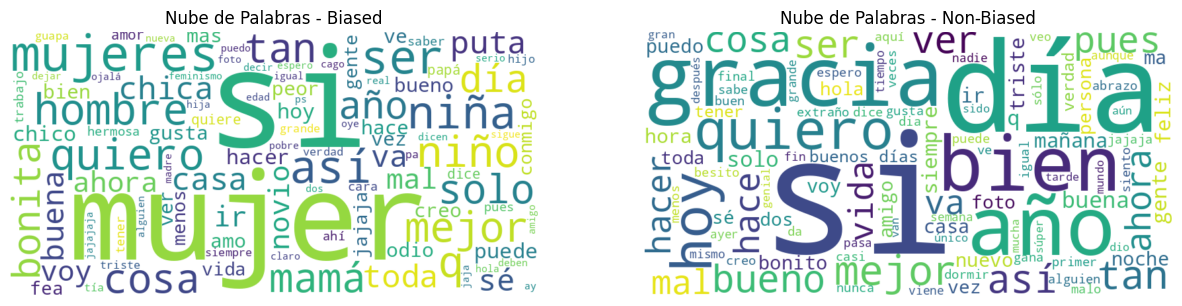

In [10]:


# Generar nube de palabras para cada conjunto
# Generar nube de palabras para cada conjunto

# 1. Nube para tweets 'Biased'
biased_text_combined = " ".join(data[data['Label'] == 'biased']['Cleaned_Contents'])

wordcloud_biased = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=stop_words,
    max_words=100
).generate(biased_text_combined)

# 2. Nube para tweets 'Non-Biased'
non_biased_text_combined = " ".join(data[data['Label'] == 'non-biased']['Cleaned_Contents'])

wordcloud_non_biased = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=stop_words,
    max_words=100
).generate(non_biased_text_combined)

# 3. Mostrar las nubes de palabras
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

axes[0].imshow(wordcloud_biased, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('Nube de Palabras - Biased')

axes[1].imshow(wordcloud_non_biased, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Nube de Palabras - Non-Biased')

plt.show()


## 7. Conclusiones y Perspectiva de Negocios
En este taller, hemos explorado cómo el análisis de texto puede ofrecer información valiosa sobre el contenido y el sentimiento de los tweets. Reflexionemos sobre algunas preguntas de negocio:
- ¿Cómo podría utilizarse este análisis para mejorar la comunicación de la marca?
- ¿Qué ajustes se podrían hacer en una campaña de marketing si los tweets son predominantemente 'biased'?
- ¿Qué patrones importantes se podrían explorar en un análisis futuro (e.g., análisis de tendencias a lo largo del tiempo)?

¿Cómo podría utilizarse este análisis para mejorar la comunicación de la marca?

Monitoreo y Prevención: El análisis de frecuencia y sentimiento permite a la marca identificar rápidamente los términos específicos y el tono negativo asociados a los tweets "biased".

Guía de Contenido: La marca puede evitar el uso de palabras o frases que aparezcan prominentemente en el grupo 'biased' para no asociar su comunicación con el sesgo. También puede promover las palabras del grupo 'non-biased' para fomentar conversaciones más neutrales o positivas.

Respuesta Proactiva: Si el sentimiento es predominantemente negativo en el grupo 'biased', la marca puede implementar un protocolo de respuesta para mitigar el daño y corregir narrativas sesgadas de manera proactiva.

¿Qué ajustes se podrían hacer en una campaña de marketing si los tweets son predominantemente 'biased'?

Reevaluación del Mensaje: Si la campaña genera sesgo, el mensaje principal debe ser revisado inmediatamente para asegurar que sea inclusivo y neutral. Es probable que haya una palabra clave, una imagen o un concepto en la campaña que esté provocando la reacción sesgada.

Segmentación y Targeting: Se podría analizar si el sesgo proviene de un segmento demográfico o geográfico específico y ajustar la difusión de la campaña en esas áreas.

Contracampaña Educativa: Lanzar contenido o una campaña que aborde el sesgo de forma directa y positiva, utilizando influencers o líderes de opinión respetados para cambiar la narrativa.

¿Qué patrones importantes se podrían explorar en un análisis futuro (e.g., análisis de tendencias a lo largo del tiempo)?

Análisis Temporal: Explorar si el volumen o el nivel de sesgo (polaridad de sentimiento) aumenta o disminuye después de eventos específicos (lanzamientos de productos, declaraciones de ejecutivos, noticias).

Análisis de Entidades Nombradas (NER): Identificar nombres de personas, organizaciones o lugares específicos que se mencionan con frecuencia en los tweets "biased" para entender los focos del conflicto.

Modelado de Temas (Topic Modeling): Usar técnicas como Latent Dirichlet Allocation (LDA) para descubrir automáticamente los temas o subtemas subyacentes dentro de los tweets 'biased' y 'non-biased', ofreciendo una comprensión más profunda de la raíz del sesgo.